# Project Overview  

This project consists of four CNN models for fashion image classification:  

1. **Primary Category Model** – Classifies images into three main categories:  
   - Glasses/Sunglasses  
   - Trousers/Jeans  
   - Shoes  

2. **Eyewear Model** – Distinguishes between:  
   - Glasses  
   - Sunglasses  

3. **Trousers Model** – Classifies trousers and jeans by gender:  
   - Trousers Male   
   - Jeans Male
   - Trousers Female  
   - Jeans Female 

4. **Footwear Model** – Classifies different types of shoes:  
   - Boots 
   - Trainers/Sneakers 
   - Sandals/Slippers  
   - Formal Shoes   
   - Others   

Each model is trained separately on its respective subset of the dataset to improve classification accuracy.


# Footwear Classification System  

This part of the project uses a **hierarchical classification approach** to categorize footwear images in three stages:

1. **Model 1 — Gender Classifier**  
   - Output labels:  
     - `0`: Male  
     - `1`: Female  

2. **Model 2 — Male Footwear Classifier**  
   - Classifies **male footwear** into five categories:  
     - `Boots (0)`  
     - `Trainers/Sneakers (1)`  
     - `Sandals/Slippers (2)`  
     - `Formal shoes (3)`  
     - `Others (4)`  

3. **Model 3 — Female Footwear Classifier**  
   - Classifies **female footwear** into the same five categories:  
     - `Boots (0)`  
     - `Trainers/Sneakers (1)`  
     - `Sandals/Slippers (2)`  
     - `Formal shoes (3)`  
     - `Others (4)`  


# Import Relevant Libraries  
Importing all the necessary libraries used for data processing, model building, and evaluation in this CNN project.


In [4]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import itertools 
import datetime

# Load the Dataset  
Loading the preprocessed dataset from `.npz` files and splitting it into training, validation, and testing sets.


In [6]:
data_train = np.load("Dataset/shoes/Shoes - All - Train.npz")
data_val = np.load("Dataset/shoes/Shoes - All - Validation.npz")
data_test = np.load("Dataset/shoes/Shoes - All - Test.npz")


In [7]:
print(f" Train shpe: {np.shape(data_train["images"])}")
print(f" Validation shpe: {np.shape(data_val["images"])}")
print(f" Test shpe: {np.shape(data_test["images"])}")


 Train shpe: (4959, 120, 90, 3)
 Validation shpe: (619, 120, 90, 3)
 Test shpe: (619, 120, 90, 3)


# Extract Images and Labels  
Extracting image data and corresponding labels from the training, validation, and testing datasets.


In [9]:
images_train = data_train["images"]
labels_train = data_train["genders"]


images_val = data_val["images"]
labels_val = data_val["genders"]


images_test = data_test["images"]
labels_test = data_test["genders"]

# Normalize Image Data  
Normalizing pixel values to the range [0, 1] to improve model training stability and performance.


In [11]:
images_train = images_train / 255.0
images_val = images_val / 255.0
images_test = images_test / 255.0


# Build and Compile the Model1

Defining a CNN model to classify shoes into two categories (Male and Female).  
- The architecture includes two convolutional and max-pooling layers, followed by a flattening layer and two dense layers (one hidden layer with 1024 units and the output layer).  
- The model is compiled using the **Adam** optimizer and **SparseCategoricalCrossentropy** loss, with **accuracy** as the evaluation metric.


In [13]:
num_epochs = 15 
batch_size = 64 


model_shoes = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64 , 5, input_shape = (120,90,3) ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = 2),

    tf.keras.layers.Conv2D(32 , 3 ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = 2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1024 , activation ="relu"),
    tf.keras.layers.Dense(2)
        
])


loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True )
model_shoes.compile(optimizer = "adam" , loss = loss_fn , metrics = ["accuracy" ])

C:\Users\rasol\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Define Callbacks and TensorBoard  

Setting up training callbacks for the Model 1:  

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2 )

log_dir = "logs//fit//shoes//" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir , histogram_freq = 1)

# Train the Model  

Training the CNN model to classify shoes into the defined categories.  

In [17]:
model_shoes.fit(images_train,
          labels_train,
          validation_data = (images_val , labels_val),
          epochs=num_epochs,
          batch_size = batch_size ,
          callbacks = [tensorboard_callback , early_stopping],
          shuffle = True
         )    

Epoch 1/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 28s 343ms/step - accuracy: 0.5767 - loss: 3.8094 - val_accuracy: 0.7851 - val_loss: 0.4605
Epoch 2/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 342ms/step - accuracy: 0.7885 - loss: 0.4592 - val_accuracy: 0.8142 - val_loss: 0.4187
Epoch 3/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 26s 329ms/step - accuracy: 0.8140 - loss: 0.4060 - val_accuracy: 0.8142 - val_loss: 0.4264
Epoch 4/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 308ms/step - accuracy: 0.8207 - loss: 0.4031 - val_accuracy: 0.7771 - val_loss: 0.4961


# Evaluate the Model  
Evaluating the trained CNN model on the test dataset to measure its final performance.  
The overall test accuracy is printed to summarize the model’s generalization capability.

In [19]:
_, model_shoes_accuracy  = model_shoes.evaluate(images_test , labels_test)
print(f"The model accuracy on test data is {model_shoes_accuracy}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7494 - loss: 0.5528
The model accuracy on test data is 0.7592892050743103


# Make Predictions  
Generating predictions on the test dataset.  

In [21]:
predictions = model_shoes.predict(images_test)
probabilities = tf.nn.softmax(predictions).numpy()*100
predictions_class = np.argmax(predictions , axis = 1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


# Confusion Matrix and Classification Report  

Computing and visualizing the confusion matrix to evaluate the model’s performance across all classes.  
- The `plot_confusion_matrix` function displays the confusion matrix with optional normalization.  
- `classification_report` from scikit-learn provides precision, recall, and F1-score for each class.  
  1. Male 
  2. Female   


In [23]:
# confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.89      0.48      0.63       259
           1       0.72      0.96      0.82       360

    accuracy                           0.76       619
   macro avg       0.81      0.72      0.72       619
weighted avg       0.79      0.76      0.74       619

Confusion matrix, without normalization
[[125 134]
 [ 15 345]]


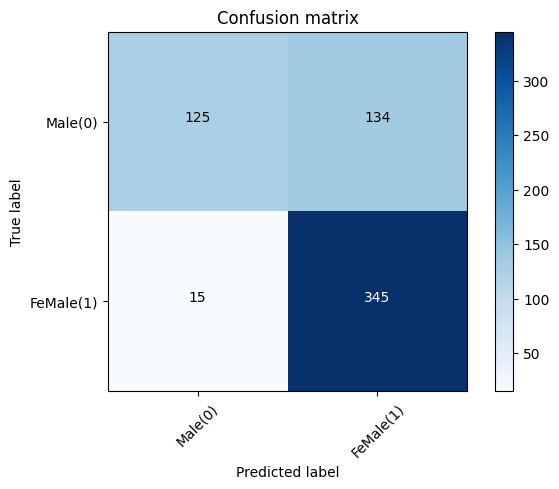

In [24]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(labels_test, predictions_class, labels=[0,1])
np.set_printoptions(precision=2)

print (metrics.classification_report(labels_test, predictions_class))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Male(0)','FeMale(1)' ],normalize= False,  title='Confusion matrix')

# Load Male Shoes Dataset  

Loading the training, validation, and test datasets for the **male footwear classification model**. 

In [26]:
data_train_male = np.load("Dataset/shoes/Shoes - Male - Train.npz")
data_val_male = np.load("Dataset/shoes/Shoes - Male - Validation.npz")
data_test_male = np.load("Dataset/shoes/Shoes - Male - Test.npz")

data_train_male

NpzFile 'Dataset/shoes/Shoes - Male - Train.npz' with keys: images, labels

In [27]:
print(f" Train shpe: {np.shape(data_train_male["images"])}")
print(f" Validation shpe: {np.shape(data_val_male["images"])}")
print(f" Test shpe: {np.shape(data_test_male["images"])}")

 Train shpe: (2073, 120, 90, 3)
 Validation shpe: (259, 120, 90, 3)
 Test shpe: (259, 120, 90, 3)


# Extract Images and Labels  
Extracting image data and corresponding labels from the training, validation, and testing datasets.


In [29]:
images_train_male = data_train_male["images"]
labels_train_male = data_train_male["labels"]


images_val_male = data_val_male["images"]
labels_val_male = data_val_male["labels"]


images_test_male = data_test_male["images"]
labels_test_male = data_test_male["labels"]


# Normalize Image Data  
Normalizing pixel values to the range [0, 1] to improve model training stability and performance.


In [31]:
images_train_male = images_train_male / 255.0
images_val_male = images_val_male / 255.0
images_test_male = images_test_male / 255.0


# Build and Compile the Male Footwear Classification Model 

In [33]:
model_shoes_male = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64 , 5, input_shape = (120,90,3) ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = 2),

    tf.keras.layers.Conv2D(32 , 3 ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = 2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1024 , activation ="relu"),
    tf.keras.layers.Dense(5)
        
])


loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True )
model_shoes_male.compile(optimizer = "adam" , loss = loss_fn , metrics = ["accuracy" ])

C:\Users\rasol\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Define Callbacks and Tensorboard for Training  


In [35]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2 )

log_dir = "logs//fit//shoes//male//" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir , histogram_freq = 1)

# Train The Model

In [37]:
model_shoes_male.fit(images_train_male,
          labels_train_male,
          validation_data = (images_val_male , labels_val_male),
          epochs=num_epochs,
          batch_size = batch_size ,
          callbacks = [tensorboard_callback , early_stopping],
          shuffle = True
         )    

Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 342ms/step - accuracy: 0.2847 - loss: 9.3040 - val_accuracy: 0.6100 - val_loss: 1.4654
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 341ms/step - accuracy: 0.6461 - loss: 1.1404 - val_accuracy: 0.8301 - val_loss: 0.5297
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 347ms/step - accuracy: 0.7963 - loss: 0.5760 - val_accuracy: 0.8301 - val_loss: 0.4590
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 329ms/step - accuracy: 0.7952 - loss: 0.5381 - val_accuracy: 0.8340 - val_loss: 0.4215
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 346ms/step - accuracy: 0.8261 - loss: 0.4774 - val_accuracy: 0.8378 - val_loss: 0.3848
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 340ms/step - accuracy: 0.8536 - loss: 0.3969 - val_accuracy: 0.8842 - val_loss: 0.3570
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 360ms/step - accuracy: 0.8703 - loss: 0.3625 - val_accuracy: 0.8764 - val_loss: 0.3514
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 363ms/step - accuracy: 0.8850 - loss: 0.3313 - val_accu

# Evaluate the Model  
Evaluating the trained CNN model on the test dataset to measure its final performance.  
The overall test accuracy is printed to summarize the model’s generalization capability.

In [39]:
_, model_shoes_male_accuracy  = model_shoes_male.evaluate(images_test_male , labels_test_male)
print(f"The model accuracy on test data is {model_shoes_male_accuracy}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8884 - loss: 0.3702
The model accuracy on test data is 0.8880308866500854


# Make Predictions  
Generating predictions on the test dataset.  

In [41]:
predictions = model_shoes_male.predict(images_test_male)
probabilities = tf.nn.softmax(predictions).numpy()*100
predictions_class = np.argmax(predictions , axis = 1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


# Confusion Matrix and Classification Report  

Computing and visualizing the confusion matrix to evaluate the model’s performance across all classes.  
- The `plot_confusion_matrix` function displays the confusion matrix with optional normalization.  
- `classification_report` from scikit-learn provides precision, recall, and F1-score for each class.  
  1. Boots  
  2. Trainers/Sneakers
  3. Sandals/Slippers
  4. Formal shoes
  5. Others


In [43]:
# confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        64
           1       0.87      0.91      0.89        66
           2       0.90      0.93      0.92        70
           3       0.82      0.88      0.85        16
           4       0.86      0.74      0.80        43

    accuracy                           0.89       259
   macro avg       0.88      0.88      0.87       259
weighted avg       0.89      0.89      0.89       259

Confusion matrix, without normalization
[[59  3  1  0  1]
 [ 2 60  4  0  0]
 [ 0  3 65  0  2]
 [ 0  0  0 14  2]
 [ 3  3  2  3 32]]


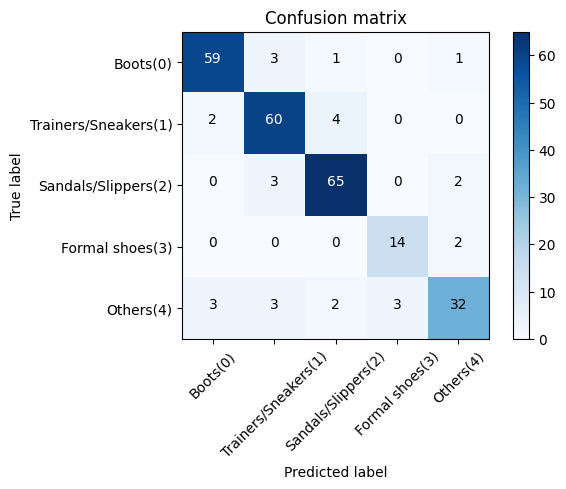

In [44]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(labels_test_male, predictions_class, labels=[0,1,2,3,4])
np.set_printoptions(precision=2)

print (metrics.classification_report(labels_test_male, predictions_class))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Boots(0)','Trainers/Sneakers(1)' ,'Sandals/Slippers(2)' ,'Formal shoes(3)' ,'Others(4)' ],normalize= False,  title='Confusion matrix')

# Load Female Shoes Dataset  

Loading the training, validation, and test datasets for the **female footwear classification model**. 

In [46]:
data_train_female = np.load("Dataset/shoes/Shoes - Female - Train.npz")
data_val_female = np.load("Dataset/shoes/Shoes - Female - Validation.npz")
data_test_female = np.load("Dataset/shoes/Shoes - Female - Test.npz")

data_train_female

NpzFile 'Dataset/shoes/Shoes - Female - Train.npz' with keys: images, labels

In [47]:
print(f" Train shpe: {np.shape(data_train_female["images"])}")
print(f" Validation shpe: {np.shape(data_val_female["images"])}")
print(f" Test shpe: {np.shape(data_test_female["images"])}")

 Train shpe: (2886, 120, 90, 3)
 Validation shpe: (360, 120, 90, 3)
 Test shpe: (360, 120, 90, 3)


# Extract Images and Labels  
Extracting image data and corresponding labels from the training, validation, and testing datasets.


In [49]:
images_train_female = data_train_female["images"]
labels_train_female = data_train_female["labels"]


images_val_female = data_val_female["images"]
labels_val_female = data_val_female["labels"]


images_test_female = data_test_female["images"]
labels_test_female = data_test_female["labels"]


# Normalize Image Data  
Normalizing pixel values to the range [0, 1] to improve model training stability and performance.


In [51]:
images_train_female = images_train_female / 255.0
images_val_female = images_val_female / 255.0
images_test_female = images_test_female / 255.0


# Build and Compile the Female Footwear Classification Model 

In [53]:
model_shoes_female = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64 , 5, input_shape = (120,90,3) ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = 2),

    tf.keras.layers.Conv2D(32 , 3 ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = 2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1024 , activation ="relu"),
    tf.keras.layers.Dense(6)
        
])


loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True )
model_shoes_female.compile(optimizer = "adam" , loss = loss_fn , metrics = ["accuracy" ])

C:\Users\rasol\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Define Callbacks and Tensorboard for Training  


In [55]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2 )

log_dir = "logs//fit//shoes//female//" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir , histogram_freq = 1)

# Train The Model

In [57]:
model_shoes_female.fit(images_train_female,
          labels_train_female,
          validation_data = (images_val_female , labels_val_female),
          epochs=num_epochs,
          batch_size = batch_size ,
          callbacks = [tensorboard_callback , early_stopping],
          shuffle = True
         )    

Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 347ms/step - accuracy: 0.2232 - loss: 6.7188 - val_accuracy: 0.4528 - val_loss: 1.3236
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 321ms/step - accuracy: 0.5294 - loss: 1.2264 - val_accuracy: 0.6056 - val_loss: 0.9586
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 14s 312ms/step - accuracy: 0.6489 - loss: 0.9207 - val_accuracy: 0.5417 - val_loss: 1.0513
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 325ms/step - accuracy: 0.7001 - loss: 0.8173 - val_accuracy: 0.8000 - val_loss: 0.6331
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 320ms/step - accuracy: 0.7823 - loss: 0.6146 - val_accuracy: 0.7944 - val_loss: 0.5878
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 328ms/step - accuracy: 0.8002 - loss: 0.5770 - val_accuracy: 0.8167 - val_loss: 0.5121
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 325ms/step - accuracy: 0.8238 - loss: 0.5118 - val_accuracy: 0.8556 - val_loss: 0.4557
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 320ms/step - accuracy: 0.8583 - loss: 0.4311 - val_accu

# Evaluate the Model  
Evaluating the trained CNN model on the test dataset to measure its final performance.  
The overall test accuracy is printed to summarize the model’s generalization capability.

In [59]:
_, model_shoes_female_accuracy  = model_shoes_female.evaluate(images_test_female , labels_test_female)
print(f"The model accuracy on test data is {model_shoes_female_accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8142 - loss: 0.5076
The model accuracy on test data is 0.8194444179534912


# Make Predictions  
Generating predictions on the test dataset.  

In [61]:
predictions = model_shoes_female.predict(images_test_female)
probabilities = tf.nn.softmax(predictions).numpy()*100
predictions_class = np.argmax(predictions , axis = 1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


# Confusion Matrix and Classification Report  

Computing and visualizing the confusion matrix to evaluate the model’s performance across all classes.  
- The `plot_confusion_matrix` function displays the confusion matrix with optional normalization.  
- `classification_report` from scikit-learn provides precision, recall, and F1-score for each class.  
  1. Boots
  2. Ballerina shoes
  3. Trainers/Sneakers
  4. Sandals/Slippers
  5. Formal shoes
  6. Others


In [63]:
# confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.93      0.77      0.84        66
           1       0.93      0.69      0.79        55
           2       0.69      0.81      0.75        54
           3       0.92      0.98      0.95        56
           4       0.86      0.80      0.83        60
           5       0.70      0.86      0.77        69

    accuracy                           0.82       360
   macro avg       0.84      0.82      0.82       360
weighted avg       0.83      0.82      0.82       360

Confusion matrix, without normalization
[[51  0 10  2  1  2]
 [ 0 38  2  0  1 14]
 [ 2  0 44  0  3  5]
 [ 1  0  0 55  0  0]
 [ 0  1  4  3 48  4]
 [ 1  2  4  0  3 59]]


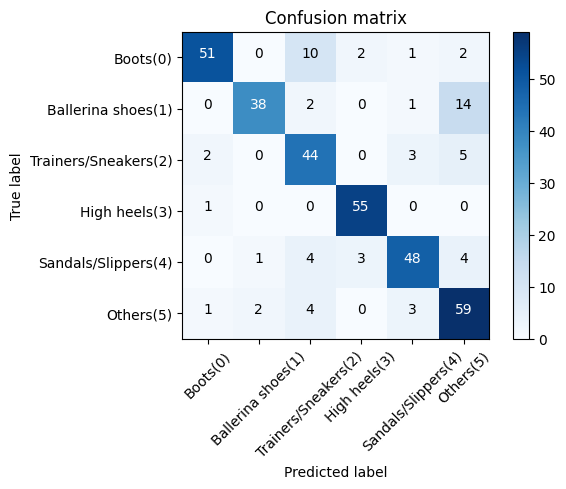

In [64]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(labels_test_female, predictions_class, labels=[0,1,2,3,4,5])
np.set_printoptions(precision=2)

print (metrics.classification_report(labels_test_female, predictions_class))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Boots(0)','Ballerina shoes(1)' ,'Trainers/Sneakers(2)' ,'High heels(3)' ,'Sandals/Slippers(4)'  ,'Others(5)'],normalize= False,  title='Confusion matrix')